# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the passenger data
passengers = pd.read_csv("C:/Users/rmart/Documents/IntroMachineLearning/passengers.csv")

# Use Sex, Age, FirstClass, Survived as Features and Split with Training and Validation

In [11]:
# Update sex column to numerical
passengers['Sex'] = np.where(passengers['Sex'] == 'female', 1, 0)
# Fill the nan values in the age column
passengers['Age'] = passengers['Age'].fillna(passengers['Age'].mean())
# Create a first class column
passengers['FirstClass'] = np.where(passengers['Pclass'] == 1, 1, 0)
# Create a second class column
passengers['SecondClass'] = np.where(passengers['Pclass'] == 1, 1, 0)

In [ ]:
features = passengers[['Sex','Age','FirstClass','SecondClass']]
survival = passengers[['Survived']]

In [63]:
passengers = passengers.dropna(subset = ['Sex', 'Age', 'FirstClass', 'SecondClass', 'Survived'])
#plt.scatter(passengers['Sex'], passengers['Age'], passengers['FirstClass'], passengers['SecondClass'], c=passengers['Survived'])

training_set, validation_set = train_test_split(passengers, train_size = 0.8, test_size = 0.2, random_state = 1)



classifier = SVC(kernel = "rbf",gamma=4,C=3)
classifier.fit(passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']], passengers['Survived'])
score = classifier.score(validation_set[['Sex', 'Age', 'FirstClass', 'SecondClass']], validation_set['Survived'])
print(score)

0.8547486033519553


# Use only Sex and Age

0.8044692737430168


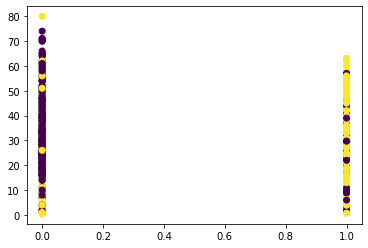

In [16]:
passengers = passengers.dropna(subset = ['Sex', 'Age', 'Survived'])
plt.scatter(passengers['Sex'], passengers['Age'], c=passengers['Survived'])

training_set, validation_set = train_test_split(passengers, train_size = 0.8, test_size = 0.2, random_state = 1)


classifier = SVC(kernel = "rbf",gamma=4,C=3)
classifier.fit(passengers[['Sex', 'Age']], passengers['Survived'])
score = classifier.score(validation_set[['Sex', 'Age']], validation_set['Survived'])
print(score)

# Use Fare and Age and For Loop to Find Optimum Gamma and C

In [132]:
largest = {'value':0, 'gamma':1, 'C':1}
for gamma in range(1,10):
    for C in range(1,10):

        passengers = passengers.dropna(subset = ['Fare', 'Age', 'Survived'])
        #plt.scatter(passengers['Fare'], passengers['Age'], c=passengers['Survived'])

        training_set, validation_set = train_test_split(passengers, train_size = 0.8, test_size = 0.2, random_state = 1)


        classifier = SVC(kernel = "rbf",gamma=gamma,C=C, probability=True)
        classifier.fit(passengers[['Fare', 'Age']], passengers['Survived'])
        score = classifier.score(validation_set[['Fare', 'Age']], validation_set['Survived'])
        if (score > largest['value']):
            largest['value'] = score
            largest['gamma'] = gamma
            largest['C'] = C
        #print(gamma, C)

print(largest)

passengers = passengers.dropna(subset = ['Fare', 'Age', 'Survived'])

training_set, validation_set = train_test_split(passengers, train_size = 0.8, test_size = 0.2, random_state = 1)


classifier = SVC(kernel = "rbf",gamma=largest['gamma'],C=largest['C'], probability=True)
classifier.fit(passengers[['Fare', 'Age']], passengers['Survived'])
score = classifier.score(validation_set[['Fare', 'Age']], validation_set['Survived'])
print(score)

{'value': 0.9497206703910615, 'gamma': 6, 'C': 9}
0.9497206703910615


In [133]:
Jack = np.array([20.0, 20.0])
Rose = np.array([1.0, 10.0])
You = np.array([30.0, 31.0])

In [134]:
# Combine passenger arrays
sample_passengers = np.array([Jack, Rose, You])

In [135]:
# Scale the sample passenger features
# define standard scaler
scaler = StandardScaler()
# transform data
sample_passengers = scaler.fit_transform(sample_passengers)

In [137]:
# Make survival predictions!
sample_passengers_predictions = classifier.predict(sample_passengers)

In [138]:
classifier.predict_proba(sample_passengers)

array([[0.57956128, 0.42043872],
       [0.57956128, 0.42043872],
       [0.57956128, 0.42043872]])

In [136]:
sample_passengers

array([[ 0.2494233 , -0.0388661 ],
       [-1.33025759, -1.20484922],
       [ 1.08083429,  1.24371532]])

In [84]:
classifier.predict_proba(sample_passengers)

[[-0.73769513 -0.5924806  -0.56568542 -0.56568542]
 [ 1.35557354  0.63878901  1.76776695  1.76776695]
 [ 1.35557354 -0.2846632  -0.56568542 -0.56568542]
 ...
 [ 1.35557354  0.         -0.56568542 -0.56568542]
 [-0.73769513 -0.2846632   1.76776695  1.76776695]
 [-0.73769513  0.17706291 -0.56568542 -0.56568542]]


# Make Features and Target Differently (Similar to Log Reg Work), Standardize Features, Classify with Gamma 4 and C 3, Check Accuracy According to Various Metrics,Test 3 Made Up Folks' Chances

In [75]:
# Update sex column to numerical
passengers['Sex'] = np.where(passengers['Sex'] == 'female', 1, 0)
# Fill the nan values in the age column
passengers['Age'] = passengers['Age'].fillna(passengers['Age'].mean())
# Create a first class column
passengers['FirstClass'] = np.where(passengers['Pclass'] == 1, 1, 0)
# Create a second class column
passengers['SecondClass'] = np.where(passengers['Pclass'] == 1, 1, 0)

passengers = passengers.dropna(subset = ['Sex', 'Age', 'FirstClass', 'SecondClass', 'Survived'])


features = passengers[['Sex','Age','FirstClass','SecondClass']]
survival = passengers[['Survived']]

C:\Users\rmart\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [76]:
largest = {'value':0, 'gamma':1, 'C':1}
for gamma in range(1,10):
    for C in range(1,10):
        features = passengers[['Sex','Age','FirstClass','SecondClass']]
        survival = passengers[['Survived']]
        # Perform train, test, split
        x_train, x_test, y_train, y_test = train_test_split(features, 
                                                            survival, 
                                                            test_size=0.2, 
                                                            random_state=200)
        # Scale the feature data so it has mean = 0 and standard deviation = 1
        # define standard scaler
        scaler = StandardScaler()
        # transform data
        scaled = scaler.fit_transform(features)
        
        classifier = SVC(kernel = "rbf",gamma=gamma,C=C,probability=True)
        classifier.fit(x_train, np.ravel(y_train,order='C')) #see https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
        score = classifier.score(x_test, y_test)

        if (score > largest['value']):
            largest['value'] = score
            largest['gamma'] = gamma
            largest['C'] = C
        #print(gamma, C)

print(largest)

{'value': 0.6201117318435754, 'gamma': 1, 'C': 1}


In [77]:
features = passengers[['Sex','Age','FirstClass','SecondClass']]
survival = passengers[['Survived']]
# Perform train, test, split
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    survival, 
                                                    test_size=0.2, 
                                                    random_state=200)
# Scale the feature data so it has mean = 0 and standard deviation = 1
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(features)
print(scaled)

classifier = SVC(kernel = "rbf",gamma=largest['gamma'],C=largest['C'], probability=True)
classifier.fit(x_train, np.ravel(y_train,order='C'))
score = classifier.score(x_test, y_test)
print(score)

[[ 0.         -0.5924806  -0.56568542 -0.56568542]
 [ 0.          0.63878901  1.76776695  1.76776695]
 [ 0.         -0.2846632  -0.56568542 -0.56568542]
 ...
 [ 0.          0.         -0.56568542 -0.56568542]
 [ 0.         -0.2846632   1.76776695  1.76776695]
 [ 0.          0.17706291 -0.56568542 -0.56568542]]
0.6201117318435754


In [78]:
predictions = classifier.predict(x_test)

In [79]:
#score mentioned above is "accuracy score"
print("Accuracy Score is:", accuracy_score(y_test, predictions))

print("Recall Score is:", recall_score(y_test, predictions))

print("Precision Score is:", precision_score(y_test, predictions))

print("f1 Score is:", f1_score(y_test, predictions))

Accuracy Score is: 0.6201117318435754
Recall Score is: 0.4
Precision Score is: 0.5660377358490566
f1 Score is: 0.46875


In [80]:
cm = metrics.confusion_matrix(y_test, predictions)

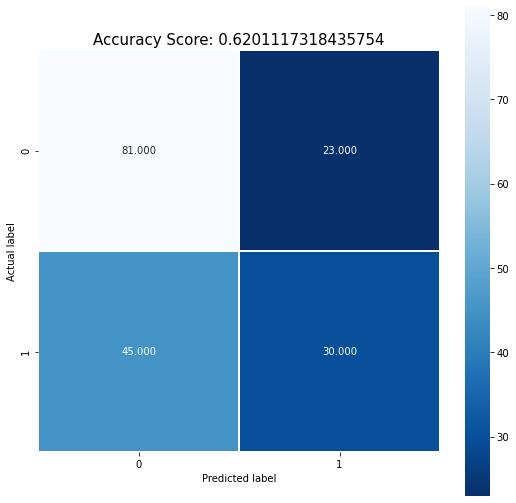

In [81]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [82]:
# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([0.0,31.0,0.0,0.0])
sample_passengers = np.array([Jack, Rose, You])

In [83]:
# Scale the sample passenger features
# define standard scaler
scaler = StandardScaler()
# transform data
sample_passengers = scaler.fit_transform(sample_passengers)
# Make survival predictions!
sample_passengers_predictions = classifier.predict(sample_passengers)

In [84]:
classifier.predict_proba(sample_passengers)

array([[0.55031795, 0.44968205],
       [0.56691873, 0.43308127],
       [0.54536806, 0.45463194]])

# Fare and Age Again but with the Same Train Test Split as Above and Standardizing Features

In [72]:
largest = {'value':0, 'gamma':1, 'C':1}
for gamma in range(1,10):
    for C in range(1,10):

        features = passengers[['Fare', 'Age']]
        survival = passengers[['Survived']]
        # Perform train, test, split
        x_train, x_test, y_train, y_test = train_test_split(features, 
                                                            survival, 
                                                            test_size=0.2, 
                                                            random_state=200)
        # Scale the feature data so it has mean = 0 and standard deviation = 1
        # define standard scaler
        scaler = StandardScaler()
        # transform data
        scaled = scaler.fit_transform(features)
        
        classifier = SVC(kernel = "rbf",gamma=gamma,C=C,probability=True)
        classifier.fit(x_train, np.ravel(y_train,order='C')) #see https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
        score = classifier.score(x_test, y_test)

        if (score > largest['value']):
            largest['value'] = score
            largest['gamma'] = gamma
            largest['C'] = C
        #print(gamma, C)
        #print(gamma, C)

print(largest)

passengers = passengers.dropna(subset = ['Fare', 'Age', 'Survived'])

training_set, validation_set = train_test_split(passengers, train_size = 0.8, test_size = 0.2, random_state = 200)


classifier = SVC(kernel = "rbf",gamma=largest['gamma'],C=largest['C'], probability=True)
classifier.fit(x_train, np.ravel(y_train,order='C'))
score = classifier.score(x_test, y_test)
print(score)

{'value': 0.6089385474860335, 'gamma': 1, 'C': 1}
0.6089385474860335


In [73]:
predictions = classifier.predict(x_test)

In [74]:
#score mentioned above is "accuracy score"
print("Accuracy Score is:", accuracy_score(y_test, predictions))

print("Recall Score is:", recall_score(y_test, predictions))

print("Precision Score is:", precision_score(y_test, predictions))

print("f1 Score is:", f1_score(y_test, predictions))

Accuracy Score is: 0.6089385474860335
Recall Score is: 0.25333333333333335
Precision Score is: 0.5757575757575758
f1 Score is: 0.3518518518518519


In [69]:
cm = metrics.confusion_matrix(y_test, predictions)

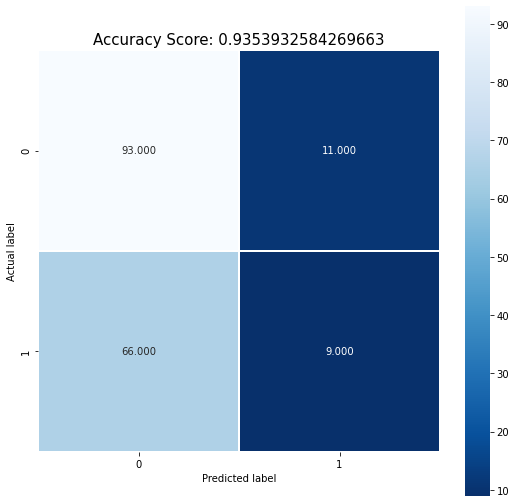

In [70]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [63]:
Jack = np.array([20.0, 20.0])
Rose = np.array([1.0, 10.0])
You = np.array([30.0, 31.0])
sample_passengers = np.array([Jack, Rose, You])
# Scale the sample passenger features
# define standard scaler
scaler = StandardScaler()
# transform data
sample_passengers = scaler.fit_transform(sample_passengers)
# Make survival predictions!
sample_passengers_predictions = classifier.predict(sample_passengers)
classifier.predict_proba(sample_passengers)

array([[0.59440806, 0.40559194],
       [0.59440806, 0.40559194],
       [0.59440806, 0.40559194]])